<a href="https://colab.research.google.com/github/apathyhill/DS-Unit-1-Sprint-4-Linear-Algebra/blob/master/module3-dimensionality-reduction/High%20Dimensional%20Data%20Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Vertical Line Test

## 1.1 Create two graphs, one that passes the vertical line test and one that does not.

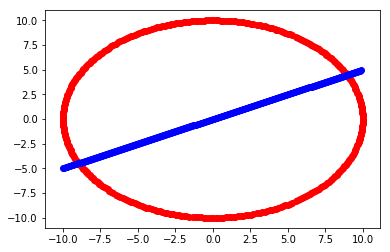

In [8]:
import matplotlib.pyplot as plt
import math

x1 = [math.sin(i)*10 for i in range(0, 360)]
y1 = [math.cos(i)*10 for i in range(0, 360)]

x2 = [i/10 for i in range(-100, 100)]
y2 = [i/2/10 for i in range(-100, 100)]

plt.scatter(x1, y1, color="red");
plt.scatter(x2, y2, color="blue");

## 1.2 Why are graphs that don't pass the vertical line test not considered "functions?"

Every x-value must only return 1 y-value

# Functions as Relations

## 2.1 Which of the following relations are functions? Why?

\begin{align}
\text{Relation 1: } \{(1, 2), (3, 2), (1, 3)\}
\\
\text{Relation 2: } \{(1, 3), (2, 3), (6, 7)\}
\\
\text{Relation 3: } \{(9, 4), (2, 1), (9, 6)\}
\\
\text{Relation 4: } \{(6, 2), (8, 3), (6, 4)\}
\\
\text{Relation 5: } \{(2, 6), (2, 7), (2, 4)\}
\end{align}

2 is the only relation that is a function, as the others do not have unique x-values.

# Functions as a mapping between dimensions


## 3.1 for the following functions what is the dimensionality of the domain (input) and codomain (range/output)?

\begin{align}
m(𝑥_1,𝑥_2,𝑥_3)=(x_1+x_2, x_1+x_3, x_2+x_3)
\\
n(𝑥_1,𝑥_2,𝑥_3,𝑥_4)=(x_2^2 + x_3, x_2x_4)
\end{align}

m: input - 3 dimensions, output - 3 dimensions
n: input - 4 dimensions, output - 2 dimensions


## 3.2 Do you think it's possible to create a function that maps from a lower dimensional space to a higher dimensional space? If so, provide an example.

The range of a higher dimension space is larger than lower dimensions, so a function can't be made, unless there's gaps.

# Vector Transformations

## 4.1 Plug the corresponding unit vectors into each function. Use the output vectors to create a transformation matrix.

\begin{align}
p(\begin{bmatrix}x_1 \\ x_2 \end{bmatrix}) = \begin{bmatrix} x_1 + 3x_2 \\2 x_2 - x_1 \\  \end{bmatrix}
\\
\\
q(\begin{bmatrix}x_1 \\ x_2 \\ x_3\end{bmatrix}) = \begin{bmatrix} 4x_1 + x_2 + 2x_3 \\2 x_2 - x_1 + 3x_3 \\ 5x_1 - 2x_3 + x_2  \end{bmatrix}
\end{align}
\begin{align}
\begin{bmatrix} 1 \ 3 \\ -1 \ 2 \end{bmatrix}
\begin{bmatrix} 4 \ 1 \ 2 \\ -1 \ 2 \ 3 \\ 5  \ 1 \ -2  \end{bmatrix}
\end{align}

## 4.2 Verify that your transformation matrices are correct by choosing an input matrix and calculating the result both via the traditional functions above and also via vector-matrix multiplication.

In [23]:
import numpy as np

input1 = np.array([2, 1])
input2 = np.array([1, 3, 2])

p = np.array([[1, 3], [-1, 2]])
q = np.array([[4, 1, 2], [-1, 2, 3], [5, 1, -2]])

print(np.dot(p, input1))
print(np.dot(q, input2))

print(np.array([input1[0] + 3*input1[1], 2*input1[1] - input1[0]]))
print(np.array([4*input2[0] + input2[1] +  2*input2[2], 2*input2[1] - input2[0] + 3*input2[2], 5*input2[0] - 2*input2[2] + input2[1]]))

[5 0]
[11 11  4]
[5 0]
[11 11  4]


# Eigenvalues and Eigenvectors

## 5.1 In your own words, give an explanation for the intuition behind eigenvalues and eigenvectors.

Eigenvectors are vectors that don't change when a trnasformation to a matrix happens, but can be scaled, by an eigenvector. These can represent an axis for a matrix.

# The Curse of Dimensionality

## 6.1 What are some of the challenges of working with high dimensional spaces?

After 3 dimensions, it becomes really hard to display each vector and their relationships.

## 6.2 What is the rule of thumb for how many observations you should have compared to parameters in your model?

Have 5 times more observations than parameters.

# Principal Component Analysis

## 7.1 Code for loading and cleaning the 2013 national dataset from the [Housing Affordability Data System (HADS)](https://www.huduser.gov/portal/datasets/hads/hads.html) --housing data, can be found below. 

## Perform PCA on the processed dataset `national_processed` (Make sure you standardize your data!) and then make a scatterplot of PC1 against PC2. Some of our discussion and work around PCA with this dataset will continue during tomorrow's lecture and assignment.

Not only does this dataset have decent amount columns to begin with (99), but in preparing the data for PCA we have also [one-hot-encoded](https://hackernoon.com/what-is-one-hot-encoding-why-and-when-do-you-have-to-use-it-e3c6186d008f#targetText=One%20hot%20encoding%20is%20a,the%20entry%20in%20the%20dataset.) all of the categorical variables. This has the effect of creating a new column for each individual category of each categorical variable. After processing this dataset has 64738 columns. --Das a lot of columns.

Don't worry too much about the mechanics of one-hot encoding right now, you will learn and experiment with a whole bunch of categorical encoding approaches in unit 2. 

The code below will read in the dataset and perform the one-hot encoding of the categorical variables. Start adding your PCA code at the bottom of the provided code.

In [0]:
import os.path
from urllib.request import urlopen
from zipfile import ZipFile
from io import BytesIO
import pandas as pd

# Read National Data 
national_url = 'https://www.huduser.gov/portal/datasets/hads/hads2013n_ASCII.zip'
national_file = 'thads2013n.txt'

if not os.path.exists(national_file):
    z_national = urlopen(national_url)
    zip_national = ZipFile(BytesIO(z_national.read())).extract(national_file)
national = pd.read_csv(national_file)[["BUILT", "VALUE"]]

In [3]:
# Look at first 5 rows
print(national.shape)
national.head()

(64535, 2)


,BUILT,VALUE
0,2006,40000
1,1980,130000
2,1985,150000
3,1985,200000
4,1980,-6


In [4]:
# Look at datatypes
# a lot of object datatypes even though they look to be strings of numbers.
national.dtypes

BUILT    int64
VALUE    int64
dtype: object

In [5]:
# check for null values
national.isnull().sum().any()

False

In [5]:
# check for number of categorical vs numeric columns
cat_cols = national.columns[national.dtypes=='object']
num_cols = national.columns[national.dtypes!='object']

print(f'{len(cat_cols)} categorical columns')
print(f'{len(num_cols)} numerical columns')

32 categorical columns
67 numerical columns


In [0]:
# Get One-Hot-Encoding of categorical variables
national = pd.get_dummies(national)[["BUILT", "VALUE"]]
print(national.shape)
national.head()

Data: 
    BUILT   VALUE
0   2006   40000
1   1980  130000
2   1985  150000
3   1985  200000
4   1980      -6

 Standardized Data: 
 [[ 1.5041963  -0.40972765]
 [ 0.5157731  -0.04831944]
 [ 0.70585449  0.0319935 ]
 ...
 [-1.00487797 -0.57037761]
 [-1.38504073 -0.57037761]
 [ 1.73229396 -0.57037761]]


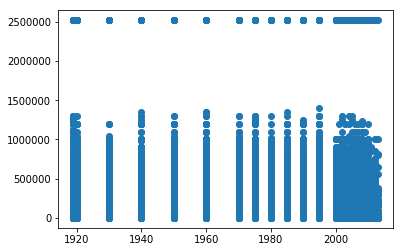

In [15]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

print("Data: \n", national.head())

plt.scatter(national["BUILT"], national["VALUE"])
scaler = StandardScaler()
Z = scaler.fit_transform(national)
print("\n Standardized Data: \n", Z)
pca = PCA(2)
pca.fit(Z)
B = pca.transform(Z)


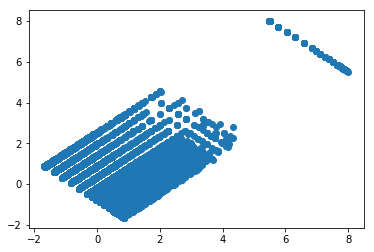

In [17]:
plt.scatter([i[0] for i in B], [i[1] for i in B])

# Stretch Goals

## 1) Perform further data exploration on the HADS national dataset (the version before we one-hot encoded it) Make scatterplots and see if you can see any resemblance between the original scatterplots and the plot of the principal components that you made in 7.1. 

(You may or may not not see very much resemblance depending on the variables you choose, and that's ok!)

## 2) Study "Scree Plots" and then try and make one for your PCA dataset. How many principal conponents do you need to retain in order for your PCs to contain 90% of the explained variance? 

We will present this topic formally at the beginning of tomorrow's lecture, so if you figure this stretch goal out, you're ahead of the game. 

## 3) Explore further the intuition behind eigenvalues and eigenvectors by creating your very own eigenfaces:

Prioritize self-study over this stretch goal if you are not semi-comfortable with the topics of PCA, Eigenvalues, and Eigenvectors.

![Eigenfaces](https://i.pinimg.com/236x/1c/f1/01/1cf101a9859437a5d096a04b05be06b4--faces-tattoo.jpg)

You don't necessarily have to use this resource, but this will get you started: 
[Eigenface Tutorial](https://sandipanweb.wordpress.com/2018/01/06/eigenfaces-and-a-simple-face-detector-with-pca-svd-in-python/)